# How to create `rand7()` using `rand5()`
We will try to create a function `rand7()` which returns a random uniform distribution for integers in the range [1-7] inclusive using the `rand5()` function which returns a random unifrom distribution for integers in the range [1-5]

In [1]:
import random

def rand5():
    return random.randint(1, 5)

## Helper function for visualizing the distribution

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def plot(rng, reps):
    counts = Counter([rng() for _ in range(reps)]).items()
    counts = sorted(counts)
    counts = {
        "Values": [count[0] for count in counts], 
        "Counts": [count[1] for count in counts]
    }
    sns.barplot(counts, x="Values", y="Counts")
    plt.show

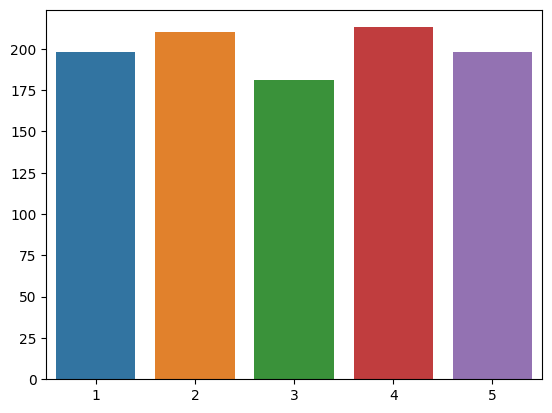

In [3]:
plot(rand5, 1_000)

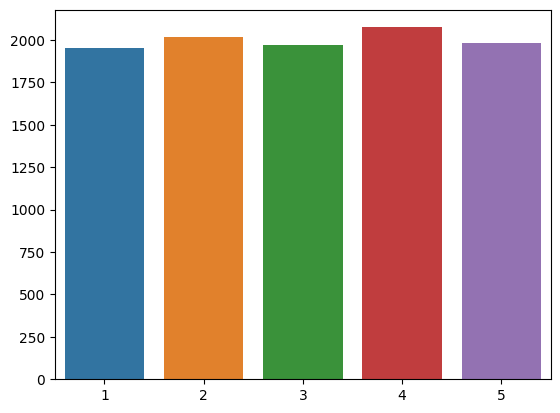

In [4]:
plot(rand5, 10_000)

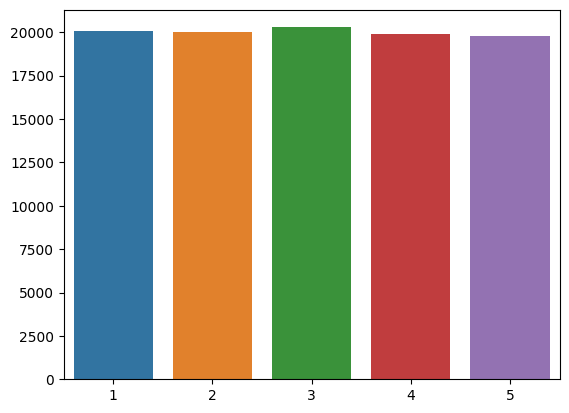

In [5]:
plot(rand5, 100_000)

We can confirm `rand5()` returns a uniform distribution and as we generate more values we get closer to a uniform distribution.

## First approach

If we try to simulate throwing 2 dices with values from 1 to 5 we get 25 possible outcome with the following occurences (we count (1, 2) and (2, 1) as the same):<br>

<pre>
Pair    Count   Pair    Count   Pair    Count
(1, 1) : 1      (1, 2) : 2      (2, 4) : 2
(2, 2) : 1      (1, 3) : 2      (2, 5) : 2
(3, 3) : 1      (1, 4) : 2      (3, 4) : 2
(4, 4) : 1      (1, 5) : 2      (3, 5) : 2
(5, 5) : 1      (2, 3) : 2      (4, 5) : 2
</pre>
If we map every 2 outcomes of 2 occurences to a unique value and 4 outcomes with 1 occurences into a unique value as well we would end up with 6 unique values with equal probability (4 / 25) and an extra value of probability (1 / 25).  
So we can consider each pair as an index into a 2-dimensional array, for example (1, 2) and (1, 3) would correspond to the value 1 for example, so its indices in the array would be (0, 1), (1, 0), (0, 2), (2, 0) and we would do the same with the rest of the values to get something close to a uniform random distribution for `rand6()`.  
The array would look like this for example: 
<pre> 
[  
    [1, 2, 2, 3, 3],  
    [2, 1, 4, 4, 5],  
    [2, 4, 1, 5, 6],  
    [3, 4, 5, 1, 6],  
    [3, 5, 6, 6, 0]  
]  
</pre>
And in fact the numbers could be in any position, the only requirement is that 4 of the values of the diagonal would be the same and the 5th value would be 0 for example so we would know that we should throw again to get one of the 6 values we want.

In [6]:
RANDOM_ARR = [  
    [1, 2, 2, 3, 3],  
    [2, 1, 4, 4, 5],  
    [2, 4, 1, 5, 6],  
    [3, 4, 5, 1, 6],  
    [3, 5, 6, 6, 0]  
]  

def rand6():
    i, j = rand5() - 1, rand5() - 1
    result = RANDOM_ARR[i][j]
    while result == 0:
        i, j = rand5() - 1, rand5() - 1
        result = RANDOM_ARR[i][j]
    return result

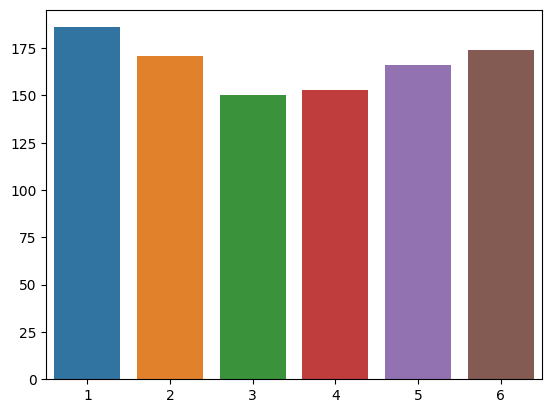

In [7]:
plot(rand6, 1_000)

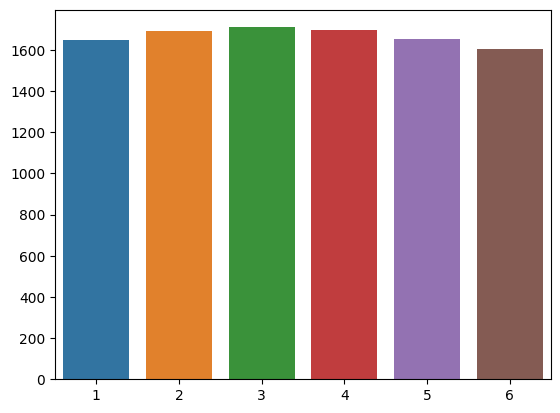

In [8]:
plot(rand6, 10_000)

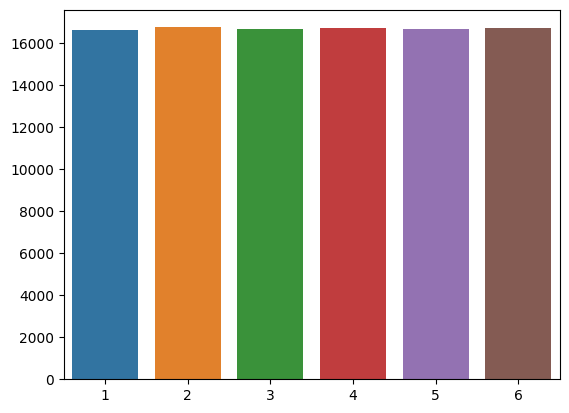

In [9]:
plot(rand6, 100_000)

We did indeed get a similar distribution to that of `rand5()`.  
And in fact every element in the `RANDOM_ARR` matrix has an equal probability (1 / 25) so the order of the elements doesn't matter, the only real requirement is that each element occurs exactly 4 times with on extra element occuring only once.  
We will extend this same idea to `rand7()` using `rand6()`. Each value from 1 to 7 would have an equal probability of (5 / 36), with one extra value (0) having a probability of (1 / 36).

In [10]:
from itertools import cycle

range_7 = cycle(range(1, 8))
RANDOM_ARR_2 = [[next(range_7) for _ in range(6)] for _ in range(6)]
RANDOM_ARR_2[-1][-1] = 0
print(*RANDOM_ARR_2, sep="\n")

[1, 2, 3, 4, 5, 6]
[7, 1, 2, 3, 4, 5]
[6, 7, 1, 2, 3, 4]
[5, 6, 7, 1, 2, 3]
[4, 5, 6, 7, 1, 2]
[3, 4, 5, 6, 7, 0]


In [11]:
Counter([value for row in RANDOM_ARR_2 for value in row])

Counter({1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5, 7: 5, 0: 1})

In [12]:
def rand7():
    i, j = rand6() - 1, rand6() - 1
    result = RANDOM_ARR_2[i][j]
    while result == 0:
        i, j = rand6() - 1, rand6() - 1
        result = RANDOM_ARR_2[i][j]
    return result

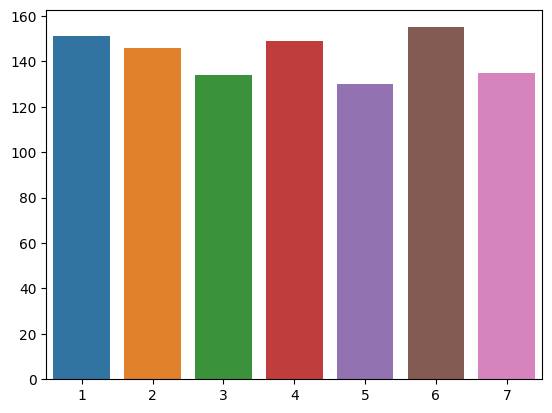

In [13]:
plot(rand7, 1_000)

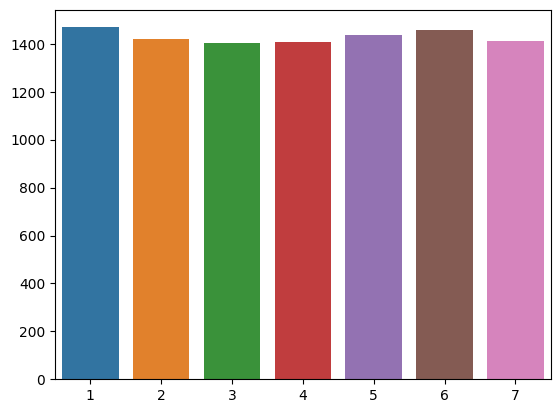

In [14]:
plot(rand7, 10_000)

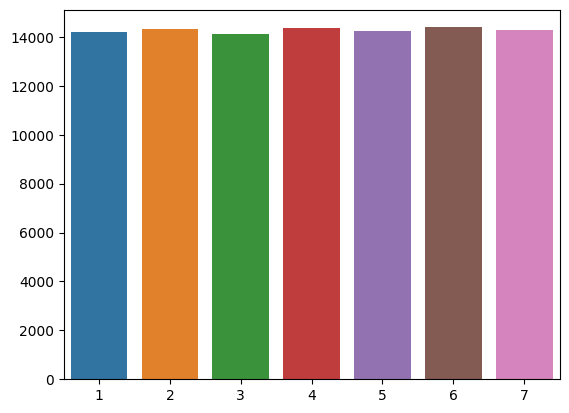

In [15]:
plot(rand7, 100_000)

## Second approach

If the `rand7()` is to be uniform, this means that, ideally, every value would appear once every 7 times, which is similar to picking elements from a shuffled lists of length 7 (or multiples of 7) based on the list `[1, 2, 3, 4, 5, 6, 7]`, once all of the elements of the shuffled have been been picked, that is the list has been exhausted a new one will be generated.  
One way to simulate this is by having an initial list `[1, 2, 3, 4, 5, 6, 7]`, using `rand5()` we can select an element from the first 5 elements, once an element has been picked, it is removed from its position and pushed to the end of the list. In other words once an element has been chosen, by pushing it to the end of the list, this would give it the least chances of reappearing and would give the least recently selected elements an equal chance of being picked by shifting the list to left.

In [16]:
def rand7_2():
    value = rand7_2.values.pop(rand5() - 1)
    rand7_2.values.append(value)
    return value
    
rand7_2.values = [1, 2, 3, 4, 5, 6, 7]

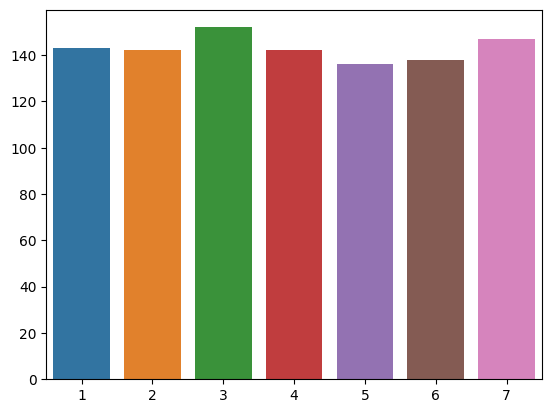

In [17]:
plot(rand7_2, 1_000)

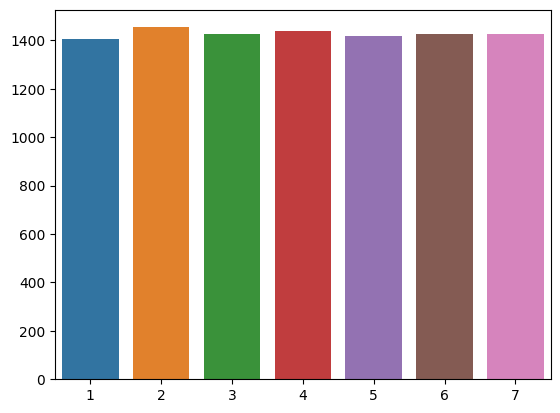

In [18]:
plot(rand7_2, 10_000)

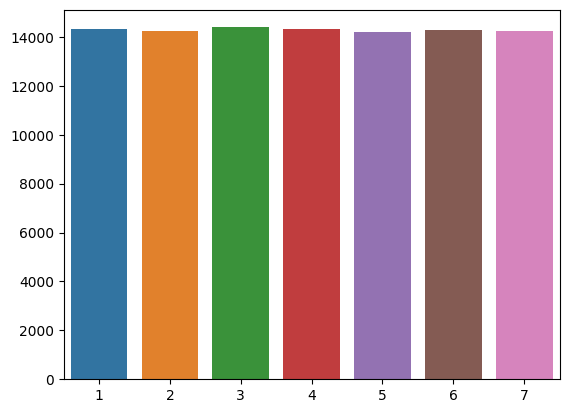

In [19]:
plot(rand7_2, 100_000)

The are at least 2 problems with this approach:  
* The first element would always be in the range 1-5.
* The chance of having the same element twice in row is null (which is common to happen normally).  
One easy fix is by making the initial list either from (1 to 7) or (7 to 1), and duplicating the elements.

In [20]:
def rand7_():
    def rng():
        value = rng.values.pop(rand5() - 1)
        rng.values.append(value)
        return value
    values = [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
    if rand5() % 2 == 0:
        values = values[::-1]
    rng.values = values
    return rng
rand7_3 = rand7_()

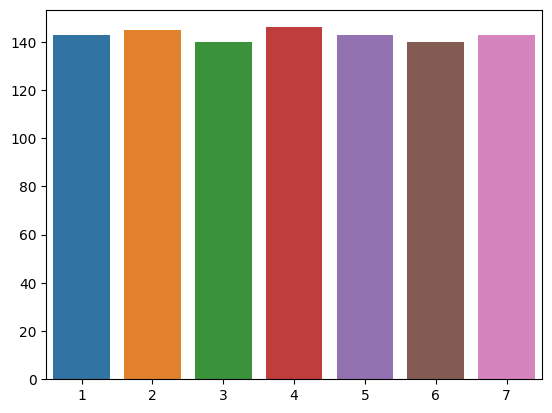

In [21]:
plot(rand7_3, 1_000)

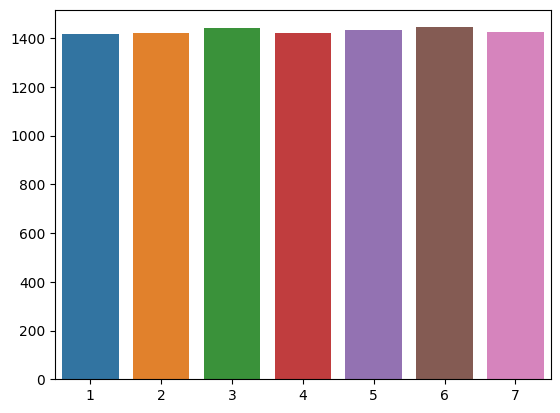

In [22]:
plot(rand7_3, 10_000)

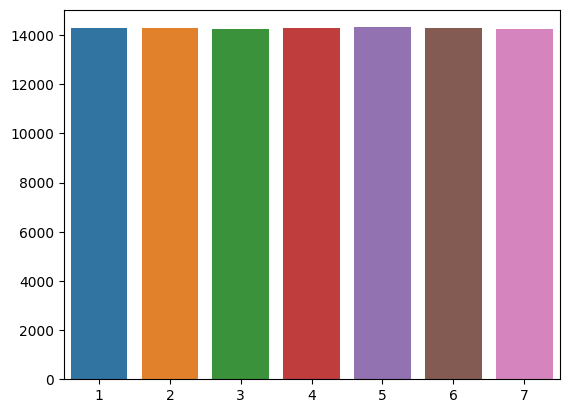

In [23]:
plot(rand7_3, 100_000)

This approach is still bad performance-wise due to the constant shifting but it's not very noticable because the list is small.

## Third approach

The idea is to have an array of values 1-7 where each values appears exactly the same number of times and then shuffle this array and retrieve elements from it. More details are in the code below:

In [24]:
def rand7_4():
    values = [value for value in range(1, 8) for _ in range(5)]
    # values = [1, 1, 1, ..., 7, 7, 7] each unique values is repeated 5 times
    
    # shuffling the values
    # I'm basically going through 7 arrays of size 5
    # Selecting a random element from a subset of 5 arrays starting from the current array
    # and swapping it with a random element from the current array
    # for example: 
    # `values = [a, b, c, d, e, f, g]` where each array a, b ..., g has size 5
    # Then we select a subset of 5 consecutive array starting from the current array
    # for example if the current array is `a`, then the subset we would be picking a random element to swap 
    # with a random element from `a` is `[a, b, c, d, e]`
    # if the current array was `e` the the subset of array would be `[e, f, g, a, b]`
    for i in range(0, 35, 5):
        for j in range(5):
            subset = rand5() - 1
            inner = rand5() - 1
            k = (i + (subset * 5 + inner)) % 35
            values[i + j], values[k] = values[k], values[i + j]
            
    return values

def RAND7():
    if not RAND7.values:
        RAND7.values = rand7_4()
    return RAND7.values.pop()
RAND7.values = None

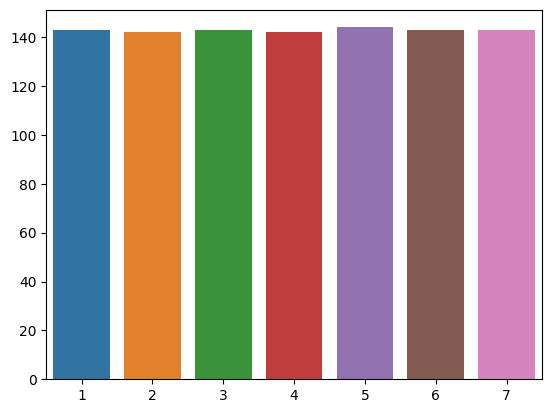

In [25]:
plot(RAND7, 1_000)

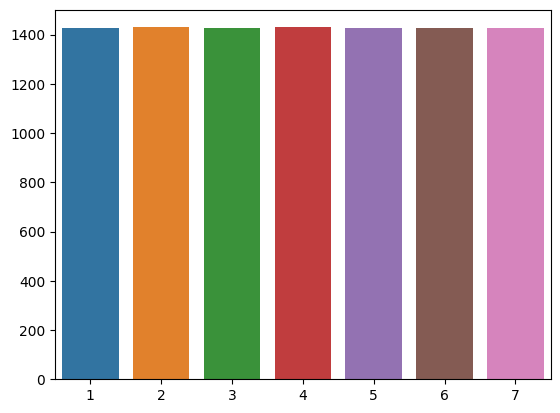

In [26]:
plot(RAND7, 10_000)

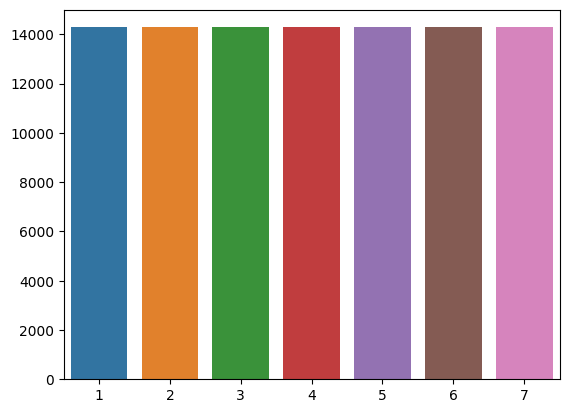

In [27]:
plot(RAND7, 100_000)